
=== Title Sütunu İçin Zipf Analizi ===


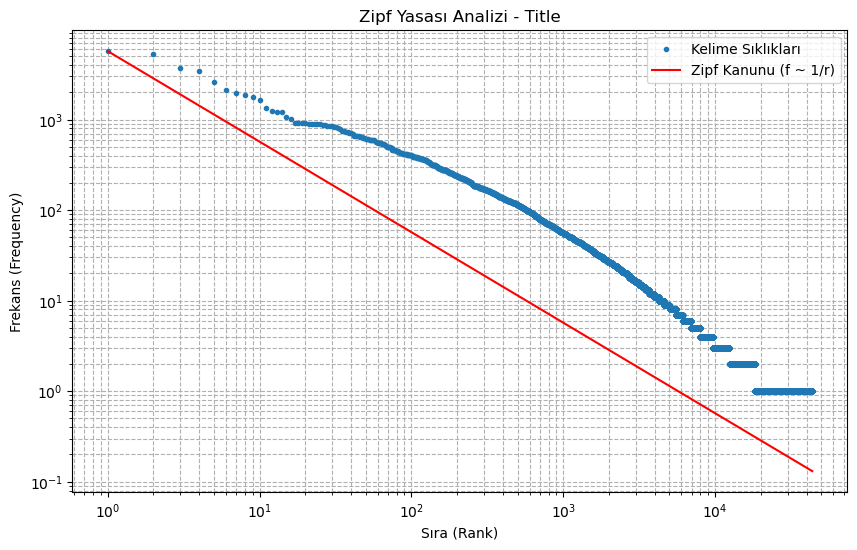


Title - En sık kullanılan ilk 10 kelime:
volum: 5709
de: 5253
vol: 3763
stori: 3486
histori: 2587
life: 2107
la: 1961
book: 1851
tale: 1790
le: 1632

Title - Veri Seti Değerlendirmesi:
Toplam token sayısı: 358446
Benzersiz token sayısı: 43569
Veri seti boyutu, Zipf Yasası analizi için yeterli görünüyor.

=== Authors Sütunu İçin Zipf Analizi ===


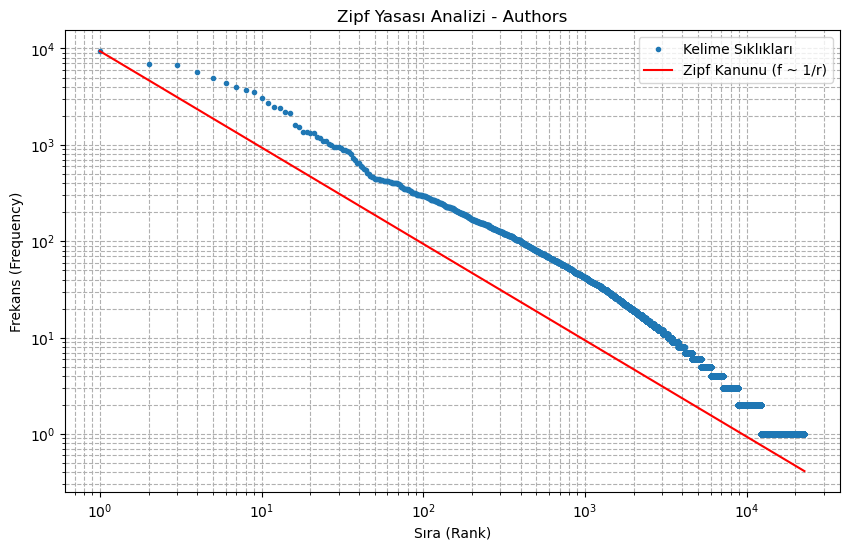


Authors - En sık kullanılan ilk 10 kelime:
illustr: 9391
translat: 6882
editor: 6816
william: 5725
john: 4960
georg: 4397
variou: 3970
henri: 3676
charl: 3539
de: 3034

Authors - Veri Seti Değerlendirmesi:
Toplam token sayısı: 290993
Benzersiz token sayısı: 22819
Veri seti boyutu, Zipf Yasası analizi için yeterli görünüyor.

=== Subjects Sütunu İçin Zipf Analizi ===


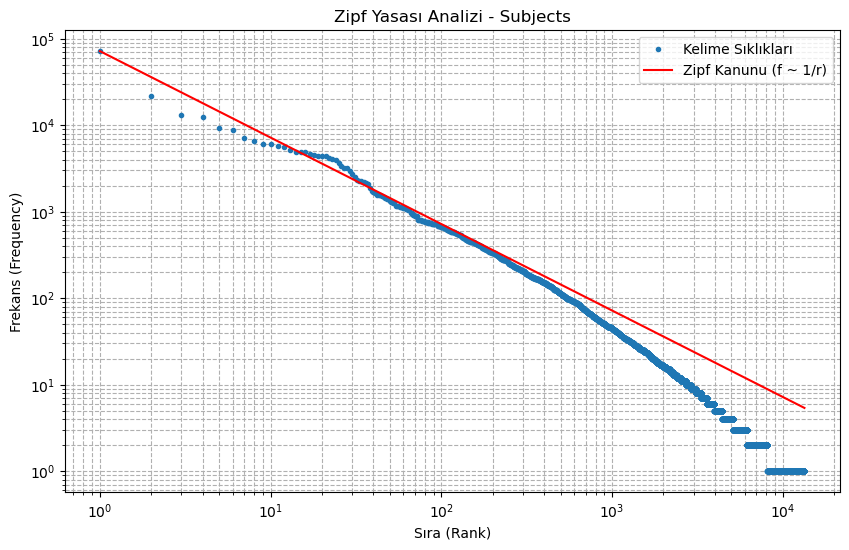


Subjects - En sık kullanılan ilk 10 kelime:
fiction: 72032
juvenil: 21766
histori: 13303
stori: 12491
centuri: 9207
life: 8832
english: 7208
state: 6515
period: 6049
england: 6025

Subjects - Veri Seti Değerlendirmesi:
Toplam token sayısı: 529303
Benzersiz token sayısı: 13384
Veri seti boyutu, Zipf Yasası analizi için yeterli görünüyor.

=== Bookshelves Sütunu İçin Zipf Analizi ===


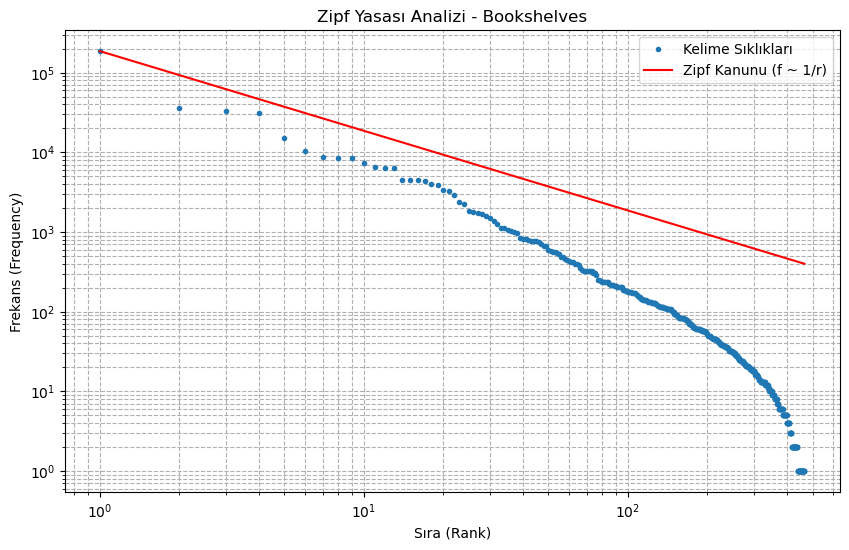


Bookshelves - En sık kullanılan ilk 10 kelime:
brows: 186435
literatur: 35967
fiction: 33273
histori: 31328
gener: 15080
children: 10332
young: 8694
adult: 8609
read: 8609
american: 7334

Bookshelves - Veri Seti Değerlendirmesi:
Toplam token sayısı: 463134
Benzersiz token sayısı: 466
Veri seti boyutu, Zipf Yasası analizi için yeterli görünüyor.


In [1]:


# Gerekli kütüphaneleri içe aktarıldı
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# NLTK kaynaklarını indirildi
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Veri setini yükle
df = pd.read_csv('pg_catalog.csv', encoding='utf-8')

# Metin analizi için sütunlar
text_columns = ['Title', 'Authors', 'Subjects', 'Bookshelves']

# İngilizce stopwords listesi
english_stopwords = set(stopwords.words('english'))

# PorterStemmer nesnesi
ps = PorterStemmer()

# Metin ön işleme fonksiyonu başlandı
def preprocess_sentence(sentence):
    if not isinstance(sentence, str):
        return []
    # Tokenlaştırma
    tokens = word_tokenize(sentence)
    # Küçük harfe çevir, sadece alfabetik tokenları al, stopwords'leri kaldır
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in english_stopwords]
    # PorterStemmer ile stemleme
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    return stemmed_tokens

# Zipf analizi fonksiyonu kodları
def perform_zipf_analysis(texts, column_name):
    # Tüm metinleri tokenlara ayır
    all_tokens = []
    for text in texts:
        tokens = preprocess_sentence(text)
        all_tokens.extend(tokens)
    
    # Kelime sıklıklarını hesapla
    word_counts = Counter(all_tokens)
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Zipf analizi için sıralı sıklıkları ve sıraları alındı
    ranks = np.arange(1, len(sorted_word_counts) + 1)
    frequencies = [count for _, count in sorted_word_counts]
    
    # Log-log grafiğini çizildi
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='none', label='Kelime Sıklıkları')
    plt.plot(ranks, frequencies[0] / ranks, 'r-', label='Zipf Kanunu (f ~ 1/r)')
    plt.xlabel('Sıra (Rank)')
    plt.ylabel('Frekans (Frequency)')
    plt.title(f'Zipf Yasası Analizi - {column_name}')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
    
    # İlk 10 kelimeyi yazdır
    print(f"\n{column_name} - En sık kullanılan ilk 10 kelime:")
    for word, count in sorted_word_counts[:10]:
        print(f"{word}: {count}")
    
    # Veri seti boyutunu değerlendir
    total_tokens = len(all_tokens)
    unique_tokens = len(word_counts)
    print(f"\n{column_name} - Veri Seti Değerlendirmesi:")
    print(f"Toplam token sayısı: {total_tokens}")
    print(f"Benzersiz token sayısı: {unique_tokens}")
    if total_tokens < 1000 or unique_tokens < 100:
        print("Uyarı: Veri seti boyutu sınırlı. Zipf Yasası'nın net gözlemlenmesi için daha büyük bir veri seti önerilir.")
    else:
        print("Veri seti boyutu, Zipf Yasası analizi için yeterli görünüyor.")

# Her sütun için Zipf analizi yap
for column in text_columns:
    print(f"\n=== {column} Sütunu İçin Zipf Analizi ===")
    texts = df[column].dropna().astype(str).tolist()
    if texts:
        perform_zipf_analysis(texts, column)
    else:
        print(f"{column} sütunu boş veya geçersiz.")